<a href="https://colab.research.google.com/github/noah40povis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
(3505+2400+3027+2798+3700+3250+2689) / 7

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import math 

In [4]:
def mean(list):
  mean = sum(list) / len(list)
  return mean


mean(sales)

3052.714285714286

In [0]:
variance_sales = sum(((x - mean(sales)) ** 2) for x in sales) / (len(sales) - 1)



In [6]:
print(variance_sales)

214387.90476190473


In [0]:
standard_deviation_sales = math.sqrt(variance_sales)

In [8]:
print(standard_deviation_sales)

463.0204150595357


In [0]:
#right a function for all three 
def mean_var_std_calculator(data):
  mean = sum(data) / len(data)
  var = sum(((x - mean) ** 2) for x in data) / (len(data) - 1)
  std = np.sqrt(var)
  return mean, var, std



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales_array = np.array([sales])
customer_array = np.array([127, 80, 105, 92, 120, 115, 93])

In [14]:
cov = np.cov(sales_array, customer_array, ddof=1)
print(cov)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
variance_customers = sum(((x - mean(customer_array)) ** 2) for x in customer_array) / (len(customer_array) - 1)

std_customers = math.sqrt(variance_customers)

correlation = cov / (std_customers*standard_deviation_sales)

In [16]:
print(correlation)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [32]:
#clean import df 
import pandas as pd 

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.drop('Unnamed: 0', axis=1, inplace=True)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [0]:
#replace nan w 0 
titanic.replace(np.nan,0,inplace=True)


In [50]:
#make sure it worked 
titanic.isnull().sum()

pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
cabin               0
embarked            0
boat                0
body                0
home.dest           0
has_cabin_number    0
dtype: int64

In [52]:
# covariance 
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.705453,-0.126482,-3.951584,0.053924,0.013952,-24.150423,-2.164033,-0.249407
survived,-0.126482,0.236181,-0.314103,-0.013932,0.034861,6.156049,-5.673581,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.462982,101.863406,1.463138
sibsp,0.053924,-0.013932,-2.557851,1.084413,0.336722,8.653922,-3.048352,-0.003858
parch,0.013952,0.034861,-1.458263,0.336722,0.748735,9.932434,-1.153653,0.013372
fare,-24.150423,6.156049,113.462982,8.653922,9.932434,2676.557808,-40.679167,10.971645
body,-2.164033,-5.673581,101.863406,-3.048352,-1.153653,-40.679167,3044.601879,0.916147
has_cabin_number,-0.249407,0.061424,1.463138,-0.003858,0.013372,10.971645,0.916147,0.174613


In [54]:
#correlation matrix 
titanic.corr(method='pearson')

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.309865,-0.365325,0.061652,0.019197,-0.555779,-0.046694,-0.710617
survived,-0.309865,1.000000,-0.050187,-0.027529,0.082901,0.244845,-0.211578,0.302469
age,-0.365325,-0.050187,1.000000,-0.190730,-0.130862,0.170297,0.143349,0.271887
sibsp,0.061652,-0.027529,-0.190730,1.000000,0.373689,0.160630,-0.053052,-0.008865
parch,0.019197,0.082901,-0.130862,0.373689,1.000000,0.221872,-0.024163,0.036982
fare,-0.555779,0.244845,0.170297,0.160630,0.221872,1.000000,-0.014250,0.507510
body,-0.046694,-0.211578,0.143349,-0.053052,-0.024163,-0.014250,1.000000,0.039734
has_cabin_number,-0.710617,0.302469,0.271887,-0.008865,0.036982,0.507510,0.039734,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

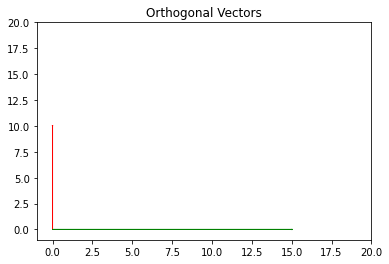

In [56]:
vector_1 = [0, 10]
vector_2 = [15, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,20)          
plt.ylim(-1,20)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# They are not orthogonal because when we run the dot product on the two vectors it does not equal 0 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [10]:
import numpy as np
c = np.negative([2,-15,6,20]) 

c_mag = (np.linalg.norm(c))**2
print(c_mag)

665.0


In [11]:
np.matmul(c,c)

665

In [14]:
np.matmul(c.T,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
\begin{bmatrix} 7 \\  \end{bmatrix}
 \begin{bmatrix} 1\\ 0  \end{bmatrix}
 +
 \begin{bmatrix} 12 \\  \end{bmatrix}
 \begin{bmatrix} 0 \ 1  \end{bmatrix} =  7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
\begin{bmatrix} 2 \\  \end{bmatrix}
 \begin{bmatrix} 1\\ 0 \\0  \end{bmatrix}
 +
 \begin{bmatrix} 11 \\  \end{bmatrix}
 \begin{bmatrix} 0 \\ 1\\ 0 \end{bmatrix} 
 \begin{bmatrix} 8 \\  \end{bmatrix}
 +
 \begin{bmatrix} 0 \\ 0\\ 1 \end{bmatrix} =2\hat{i} + 11\hat{j} + 8\hat{k}
\end{align}
 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [25]:
f = np.array([4,12,11,9,2])
norm_f = np.linalg.norm(f)
unit_vector = f / norm_f
unit_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

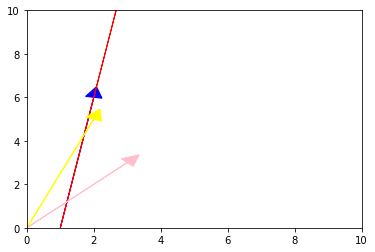

In [11]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([1,6])
x2 = np.multiply(3,x)
z = np.array([2,5])
u = np.array([3,3])


plt.arrow(1,0,x[0],x[1],head_width=.5,head_length=.5, color='blue') # dependent 
plt.arrow(1,0,x2[0],x2[1], head_width=.5, head_length=.5, color='red') # dependent 
plt.arrow(0,0,z[0],z[1], head_width=.5, head_length=.5, color='yellow') # independent 
plt.arrow(0,0,u[0],u[1], head_width=.5, head_length=.5, color='pink') # independent 
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()




# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# there is no linear combination because h is a scalar multiple of g 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

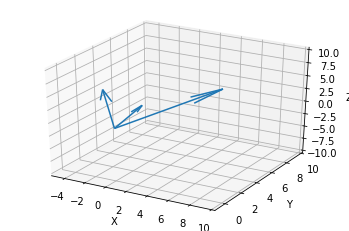

In [12]:
vector1 = [1, 2, 3]
vector2 = [-1, 0, 7]
vector3 = [4, 8, 2]

vectors = np.array([
                    [0, 0, 0, 1, 2, 3],
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2],
                    ])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length = 1)
ax.set_xlim([-5, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



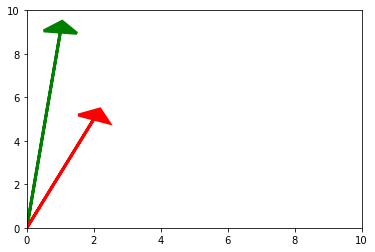

In [13]:
plt.xlim(0,10)          
plt.ylim(0,10)

# Original Vector
v = [1,9] 
w = [2,5]

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=1, head_length=0.5, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=1, head_length=0.5, color ='red')
plt.show()

## 6.2 What does it mean to form a basis?

To form a set of vectors that are linearly independent 


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Rank is 3 dimensions

In [2]:
import numpy as np

p = np.array
p = np.array([[1,2,3], [-1,0,7],[4,8,2]])

np.linalg.matrix_rank(p)



3

## 7.2 What does the rank of a matrix tell us?

That it is in 3 dimensions. 



# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

#Source: https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/

In [9]:
v = np.array([1,3])
w = np.negative([-1,2])

def proj(v,w):
    '''Project vector v onto w.'''
    v = np.array(v)
    w = np.array(w)
    return np.sum(v * w)/np.sum(w * w) * w   


proj(v,w)

array([-1.,  2.])

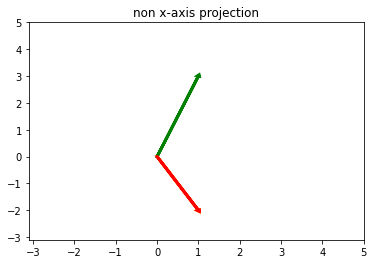

In [13]:
import matplotlib.pyplot as plt

plt.xlim(-3.1,5)          
plt.ylim(-3.1,5)
proj = np.negative([-1,2])
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

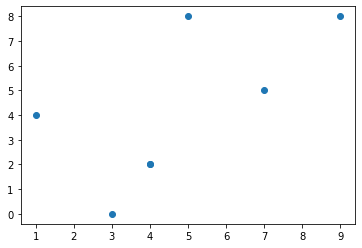

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()